## Lattice based models


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math

def build_sir(beta, gamma, rho):
    def calc_next_sir_timestep(t, populations):
        populations = populations.reshape((-1,3))
        
        lambda_ = beta * np.sum(rho * populations[:,1], axis=1) / np.sum(populations, axis=1)
        infection_rate = lambda_ * populations[:,0]
        infection_rate += np.sqrt(infection_rate) * np.random.normal(0, 1, len(infection_rate))
        
        recovery_rate = gamma * populations[:,1] 
        recovery_rate += np.sqrt(recovery_rate) * np.random.normal(0, 1, len(recovery_rate))
        
        infection_rate = np.clip(infection_rate, 0, None)
        recovery_rate = np.clip(recovery_rate, 0, None)
        
        return np.array([
            - infection_rate,
            infection_rate - recovery_rate,
            recovery_rate
        ]).T.flatten()
    return calc_next_sir_timestep

def create_rho_matrix(grid_width, rho):
    return np.array([[rho if ((i == j + 1  or i  == j-1) and 
                            math.floor(i / grid_width) == math.floor(j / grid_width)) or 
                           abs(i - j) == grid_width  else 0
                for j in range(grid_width**2)]
                    for i in range(grid_width**2)])


/Users/jurrew27/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':
/Users/jurrew27/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


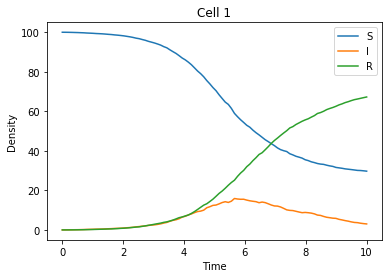

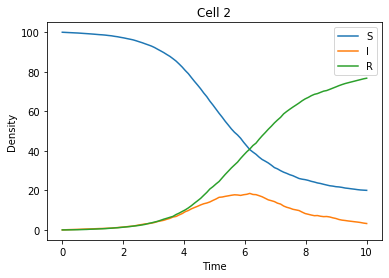

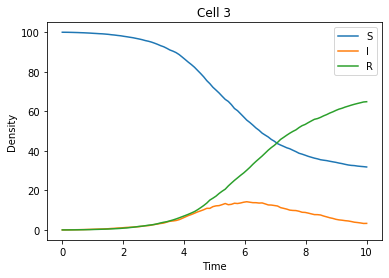

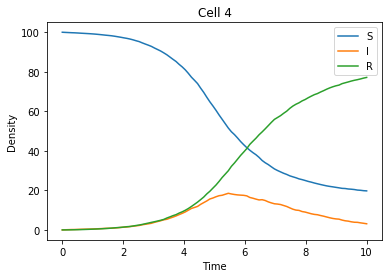

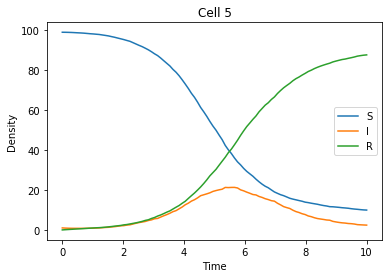

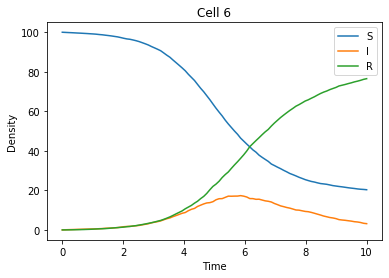

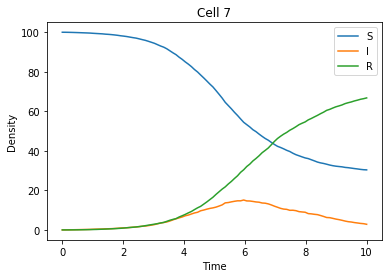

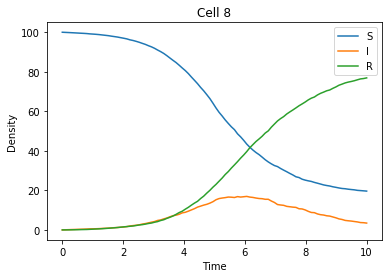

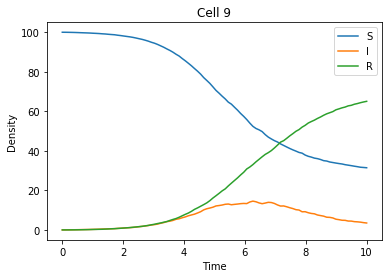

In [34]:
grid_width = 3
v_beta = 3
v_gamma = 1
initial_condition = np.array([[100, 0, 0], [100, 0, 0], [100, 0, 0],
                              [100, 0, 0], [99, 1, 0], [100, 0, 0],
                              [100, 0, 0], [100, 0, 0], [100, 0, 0]], dtype=np.float64)
v_rho = create_rho_matrix(grid_width, rho=0.25)


time = 10
steps = 100

result = solve_ivp(
    fun=build_sir(beta=v_beta, gamma=v_gamma, rho=v_rho), 
    t_span=(0, time),
    t_eval=np.linspace(0, time, steps),
    y0=initial_condition.flatten()
)
results = result.y.reshape((-1,3,steps))

for i, pop in enumerate(results):
    plt.figure()
    plt.plot(result.t, pop.T)
    plt.title(f'Cell {i+1}')
    plt.legend(['S', 'I', 'R'])
    plt.xlabel('Time')
    plt.ylabel('Density')

plt.show() 


In [ ]:
grid_width = 5
v_beta = 3
v_gamma = 1
initial_condition = np.array([[100, 0, 0] for _ in range(grid_width**2)])
initial_condition[math.floor(len(initial_condition) / 2)] = [99, 1, 0]
v_rho = create_rho_matrix(grid_width, rho=0.25)
time = 20
steps = 20

solution = solve_ivp(
    fun=build_sir(beta=v_beta, gamma=v_gamma, rho=v_rho), 
    t_span=(0, time),
    t_eval=np.linspace(0, time, steps),
    y0=initial_condition.flatten()
)
results = solution.y.reshape((-1,3,steps))
plt.matshow(results[:,1,-1].reshape(grid_width, grid_width), cmap='gray')

/Users/jurrew27/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':
/Users/jurrew27/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


/Users/jurrew27/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/Users/jurrew27/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


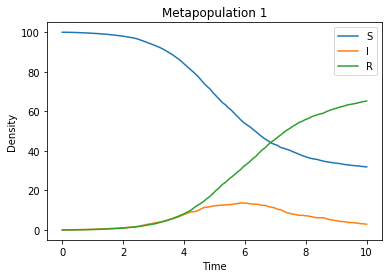

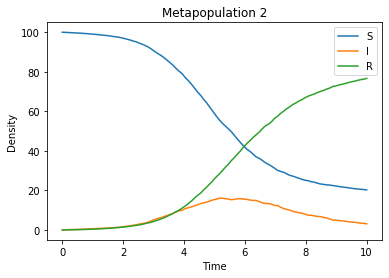

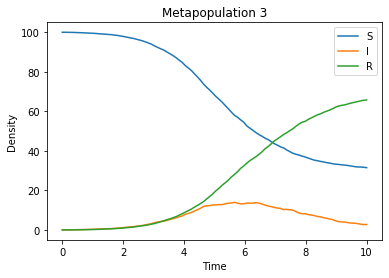

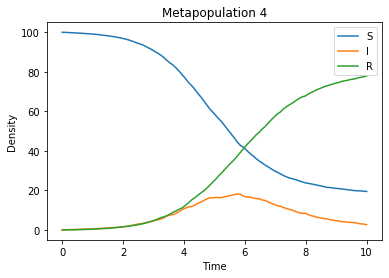

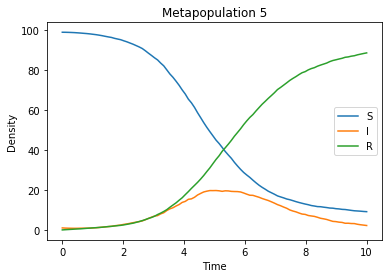

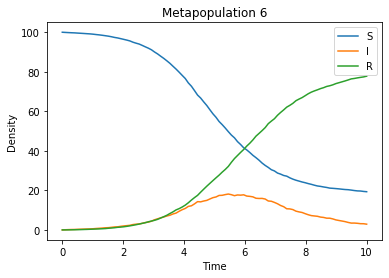

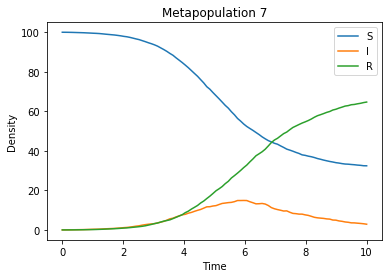

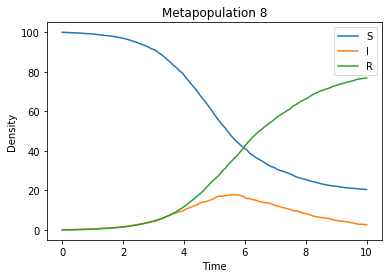

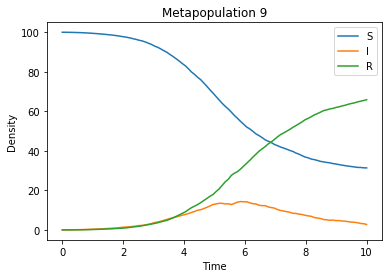

In [31]:

bla = results[:,1,4].reshape(grid_width, grid_width)
plt.matshow(bla, cmap='gray')